In [1]:
import numpy as np

from graph import Graph

In [2]:
def bron_kerbosh(R, P, X, edges):
    if not P and not X:
        return [R]

    independent_sets = []
    u = list(P.union(X))[0]     
    for v in P - edges[u]:
        independent_sets.extend(bron_kerbosh(
            R.union([v]),
            P.intersection(edges[v]),
            X.intersection(edges[v]), 
            edges)
        )

        P.remove(v)
        X.add(v)

    return independent_sets

def get_max_independent_set(graph):
    vertices = set(range(graph.num_vertices))
    edges = {v : vertices - graph.edges[v] - set([v]) for v in vertices}
    
    independent_sets = bron_kerbosh(
        R=set(),
        P=set(edges.keys()),
        X=set(),
        edges=edges
    )

    max_len = 0
    index = 0
    for i, independent_set in enumerate(independent_sets):
        if len(independent_set) > max_len:
            max_len = len(independent_set)
            index = i

    return independent_sets[index]

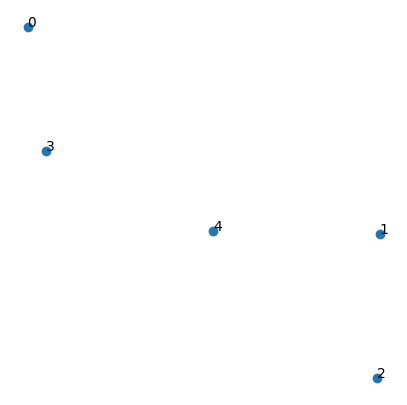

Independent vertices: {0, 1, 2, 3, 4}


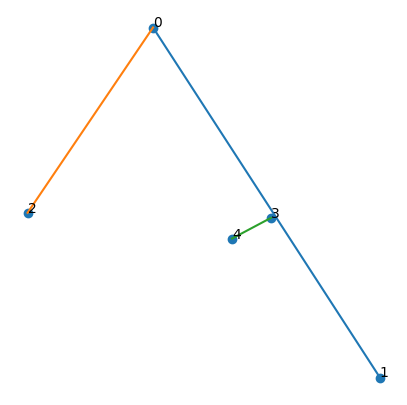

Independent vertices: {1, 2, 3}


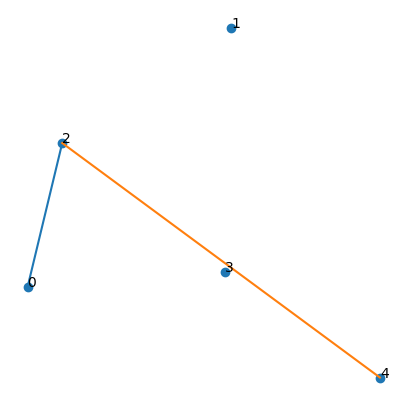

Independent vertices: {0, 1, 3, 4}


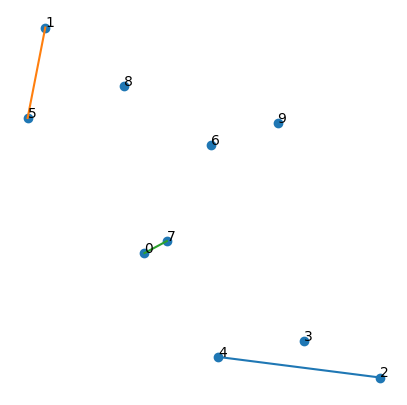

Independent vertices: {0, 1, 2, 3, 6, 8, 9}


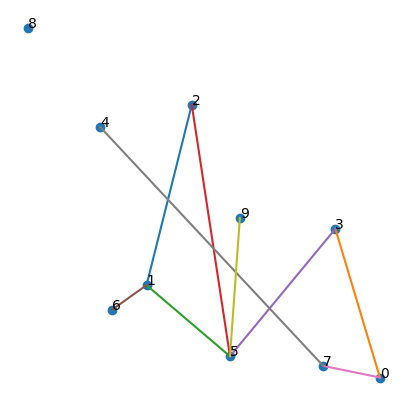

Independent vertices: {0, 2, 4, 6, 8, 9}


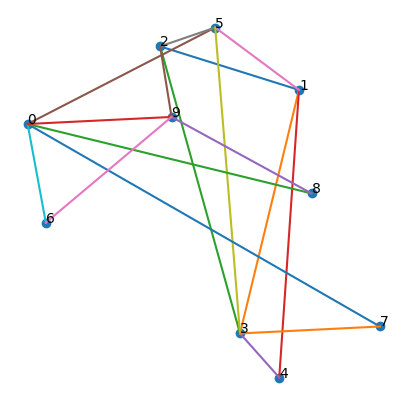

Independent vertices: {4, 5, 6, 7, 8}


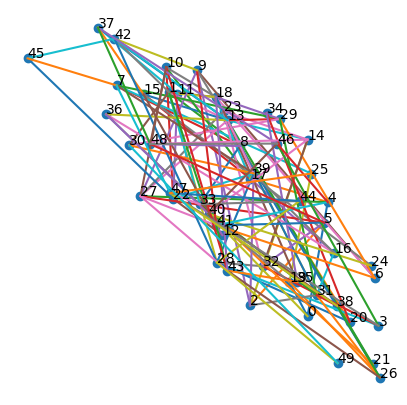

Independent vertices: {0, 1, 3, 5, 9, 10, 11, 12, 14, 20, 21, 24, 25, 26, 29, 35, 36, 39, 44, 45, 49}


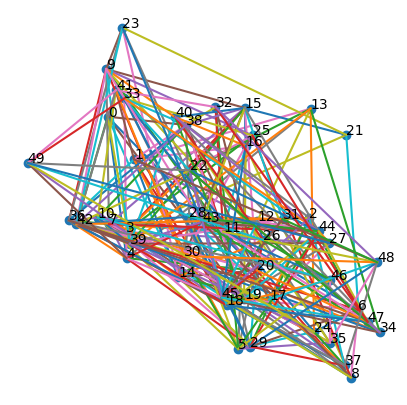

Independent vertices: {0, 32, 6, 7, 40, 10, 12, 49, 17, 18, 23, 25, 30, 31}


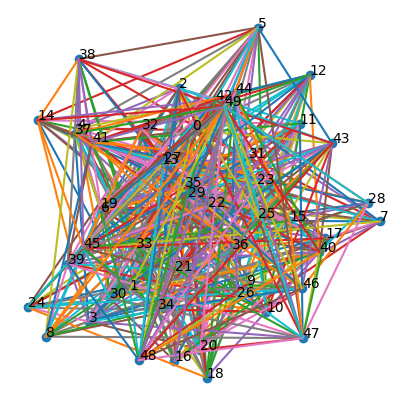

Independent vertices: {7, 8, 13, 14, 48, 18, 20, 28, 30}


In [3]:
for num_vertices in [5, 10, 50]:
    for p in [0.1, 0.2, 0.5]:
        graph = Graph(num_vertices)
        graph.make_random(p)
        graph.draw(5, 5)
        vertices = get_max_independent_set(graph)
        print(f"Independent vertices: {vertices}")